In [93]:
%cd /content/drive/MyDrive/Colab Notebooks/MachineLearning/HW4

/content/drive/MyDrive/Colab Notebooks/MachineLearning/HW4


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from google.colab import files

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.utils import plot_model

In [39]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
selected_cols = ['sex', 'smoker', 'region']
ord_enc = OrdinalEncoder ()
df[selected_cols]=ord_enc.fit_transform(df[selected_cols])
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


In [48]:
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

In [73]:
model = Sequential([Dense(8, input_dim = 6, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    # Dense(16, activation = 'relu'),
                    # Dense(8, activation = 'relu'),
                    Dense(1, activation = 'linear')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 8)                 56        
                                                                 
 dense_45 (Dense)            (None, 16)                144       
                                                                 
 dense_46 (Dense)            (None, 32)                544       
                                                                 
 dense_47 (Dense)            (None, 1)                 33        
                                                                 
Total params: 777
Trainable params: 777
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile (optimizer= 'adam', loss= 'mse', metrics= ['mae'])

In [75]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, verbose = 1, validation_split= 0.2)

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 0.4148 - mae: 0.5399 - val_loss: 0.1332 - val_mae: 0.2719
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0903 - mae: 0.1952 - val_loss: 0.0436 - val_mae: 0.1575
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0509 - mae: 0.1782 - val_loss: 0.0377 - val_mae: 0.1609
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0445 - mae: 0.1695 - val_loss: 0.0326 - val_mae: 0.1443
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0389 - mae: 0.1529 - val_loss: 0.0291 - val_mae: 0.1327
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0330 - mae: 0.1387 - val_loss: 0.0237 - val_mae: 0.1214
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0252 - mae: 0.1248 - val_loss: 0.0185 - val_mae: 0.1072
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0200 - 

In [76]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

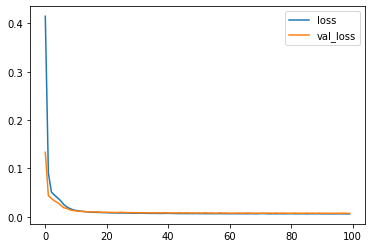

In [79]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.savefig('loss.png')
files.download('loss.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

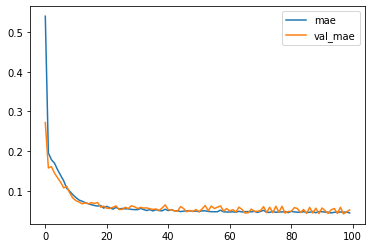

In [80]:
plt.plot (history.history['mae'], label = 'mae')
plt.plot (history.history['val_mae'], label = 'val_mae')
plt.legend()
plt.savefig('mae.png')
files.download('mae.png')

## Polynomial Features included

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
poly = PolynomialFeatures(2)
new_features = poly.fit_transform(features)
x_train, x_test, y_train, y_test = train_test_split(new_features, target, test_size = 0.3)

In [92]:
poly.fit_transform(features).shape

(1338, 28)

In [87]:
model = Sequential([Dense(8, input_dim = 28, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    # Dense(16, activation = 'relu'),
                    # Dense(8, activation = 'relu'),
                    Dense(1, activation = 'linear')
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 8)                 232       
                                                                 
 dense_53 (Dense)            (None, 16)                144       
                                                                 
 dense_54 (Dense)            (None, 32)                544       
                                                                 
 dense_55 (Dense)            (None, 1)                 33        
                                                                 
Total params: 953
Trainable params: 953
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile (optimizer= 'adam', loss= 'mse', metrics= ['mae'])
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, verbose = 1, validation_split= 0.2)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 0.0484 - mae: 0.1509 - val_loss: 0.0350 - val_mae: 0.1405
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0270 - mae: 0.1192 - val_loss: 0.0223 - val_mae: 0.1100
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0177 - mae: 0.0988 - val_loss: 0.0125 - val_mae: 0.0823
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0125 - mae: 0.0809 - val_loss: 0.0092 - val_mae: 0.0698
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0107 - mae: 0.0726 - val_loss: 0.0081 - val_mae: 0.0645
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0097 - mae: 0.0675 - val_loss: 0.0075 - val_mae: 0.0597
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0091 - mae: 0.0644 - val_loss: 0.0074 - val_mae: 0.0591
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0087 - m

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

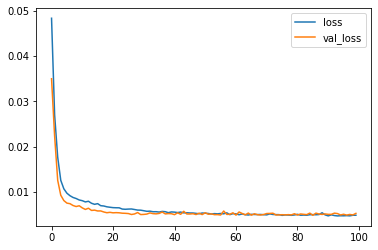

In [90]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.savefig('loss_poly.png')
files.download('loss_poly.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

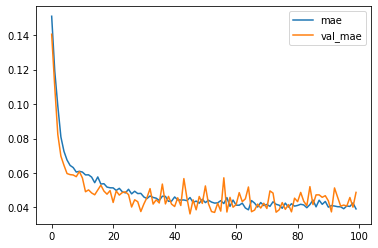

In [91]:
plt.plot (history.history['mae'], label = 'mae')
plt.plot (history.history['val_mae'], label = 'val_mae')
plt.legend()
plt.savefig('mae_poly.png')
files.download('mae_poly.png')